<a href="https://colab.research.google.com/github/NamPM-01/movie-revenue-analysis-2025/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
url = "https://www.boxofficemojo.com/year/2025/?area=VN&sort=gross&ref_=bo_yld__resort#table"
tables = pd.read_html(url)
df = tables[0]
print(df.head())
df.to_csv("vietnam_boxoffice_2025.csv",index=False)

   Rank                              Release Genre Budget Running Time  \
0     1                             Red Rain     -      -            -   
1     2                        The 4 Rascals     -      -            -   
2     3  Detective Kien: The Headless Horror     -      -            -   
3     4                             Hijacked     -      -            -   
4     5         Face Off 8: Embrace of Light     -      -            -   

         Gross  Theaters  Total Gross Release Date    Distributor  Estimated  
0  $26,679,574     12768  $27,028,224       Aug 21  Galaxy Studio      False  
1  $10,253,939     14077  $13,017,642       Jan 29  Galaxy Studio      False  
2   $9,536,331      7728   $9,536,331       Apr 25  Galaxy Studio      False  
3   $9,359,042     10590   $9,540,357       Sep 18  Galaxy Studio      False  
4   $8,887,206      8508   $8,887,206       Apr 27            CGV      False  


# Data cleaning

In [4]:
df = pd.read_csv('/content/vietnam_boxoffice_2025.csv')
df = df.drop(columns=['Genre' , 'Budget' , 'Running Time'])

## Data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          200 non-null    int64 
 1   Release       200 non-null    object
 2   Gross         200 non-null    object
 3   Theaters      200 non-null    int64 
 4   Total Gross   200 non-null    object
 5   Release Date  200 non-null    object
 6   Distributor   200 non-null    object
 7   Estimated     200 non-null    bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 11.3+ KB


In [ ]:
df

,Rank,Release,Gross,Theaters,Total Gross,Release Date,Distributor,Estimated
0,1,Red Rain,"$26,679,574",12768,"$27,028,224",Aug 21,Galaxy Studio,False
1,2,The 4 Rascals,"$10,253,939",14077,"$13,017,642",Jan 29,Galaxy Studio,False
2,3,Detective Kien: The Headless Horror,"$9,536,331",7728,"$9,536,331",Apr 25,Galaxy Studio,False
3,4,Hijacked,"$9,359,042",10590,"$9,540,357",Sep 18,Galaxy Studio,False
4,5,Face Off 8: Embrace of Light,"$8,887,206",8508,"$8,887,206",Apr 27,CGV,False
...,...,...,...,...,...,...,...,...
195,196,"Doi Gi, Mo Di","$11,763",376,"$11,763",Jul 11,Universal Pictures International (UPI),False
196,197,Hello Jadoo: The Accidental Hero,"$11,751",125,"$83,150",Aug 29,CGV,False
197,198,The Cat ReturnsStudio Ghibli Fest 2024,"$11,649",545,"$102,855",-,-,False
198,199,Bit Mat Bat Nai,"$11,410",547,"$13,650",Oct 30,-,False


In [6]:
df['Release Date'] = df['Release Date'].str.strip()
df['Release Date'] = df['Release Date'] + ", 2025"
df['Release Date'] = pd.to_datetime(df['Release Date'], format="%b %d, %Y", errors='coerce')

## Null and missing values

In [7]:
df['Distributor'] = df['Distributor'].replace('-','unknown')

In [ ]:
df

,Rank,Release,Gross,Theaters,Total Gross,Release Date,Distributor,Estimated
0,1,Red Rain,"$26,679,574",12768,"$27,028,224",2025-08-21,Galaxy Studio,False
1,2,The 4 Rascals,"$10,253,939",14077,"$13,017,642",2025-01-29,Galaxy Studio,False
2,3,Detective Kien: The Headless Horror,"$9,536,331",7728,"$9,536,331",2025-04-25,Galaxy Studio,False
3,4,Hijacked,"$9,359,042",10590,"$9,540,357",2025-09-18,Galaxy Studio,False
4,5,Face Off 8: Embrace of Light,"$8,887,206",8508,"$8,887,206",2025-04-27,CGV,False
...,...,...,...,...,...,...,...,...
195,196,"Doi Gi, Mo Di","$11,763",376,"$11,763",2025-07-11,Universal Pictures International (UPI),False
196,197,Hello Jadoo: The Accidental Hero,"$11,751",125,"$83,150",2025-08-29,CGV,False
197,198,The Cat ReturnsStudio Ghibli Fest 2024,"$11,649",545,"$102,855",NaT,unknown,False
198,199,Bit Mat Bat Nai,"$11,410",547,"$13,650",2025-10-30,unknown,False


In [8]:
print(df.isnull().sum())
print(df.isnull().any(axis=1).sum())


Rank            0
Release         0
Gross           0
Theaters        0
Total Gross     0
Release Date    9
Distributor     0
Estimated       0
dtype: int64
9


## Duplicate values

In [9]:
df.nunique()

,0
Rank,200
Release,200
Gross,200
Theaters,196
Total Gross,200
Release Date,95
Distributor,10
Estimated,1


In [10]:
df_dup = df[df.duplicated(keep=False)]

In [ ]:
df_dup
# không có giá trị nào bị trùng hoàn toàn dựa trên việc so sánh giữa các dòng

,Rank,Release,Gross,Theaters,Total Gross,Release Date,Distributor,Estimated


In [ ]:
df.head(2)

,Rank,Release,Gross,Theaters,Total Gross,Release Date,Distributor,Estimated,month
0,1,Red Rain,"$26,679,574",12768,"$27,028,224",2025-08-21,Galaxy Studio,False,8
1,2,The 4 Rascals,"$10,253,939",14077,"$13,017,642",2025-01-29,Galaxy Studio,False,1


# View all values

In [11]:
df['month'] = df['Release Date'].dt.month.astype('Int64')

In [12]:
# chuyển chuỗi total gross về dạng float để tính
df['Total Gross'] = df['Total Gross'].replace(r'[\$,]','',regex=True).astype(float)
# tính tổng doanh thu cả năm 2025
df_total_gross = (df['Total Gross']).sum()

In [13]:
print(f"{df_total_gross:,.0f}")

219,154,556


In [14]:
# tổng doanh thu của các phim theo từng tháng :
df_month = df.groupby('month').agg(total=('Total Gross',lambda x: int(x.sum()))).reset_index()

In [15]:
df_month

,month,total
0,1,24134338
1,2,20913739
2,3,9869555
3,4,32438122
4,5,14282023
5,6,10015879
6,7,20832869
7,8,38816850
8,9,13360232
9,10,20076606


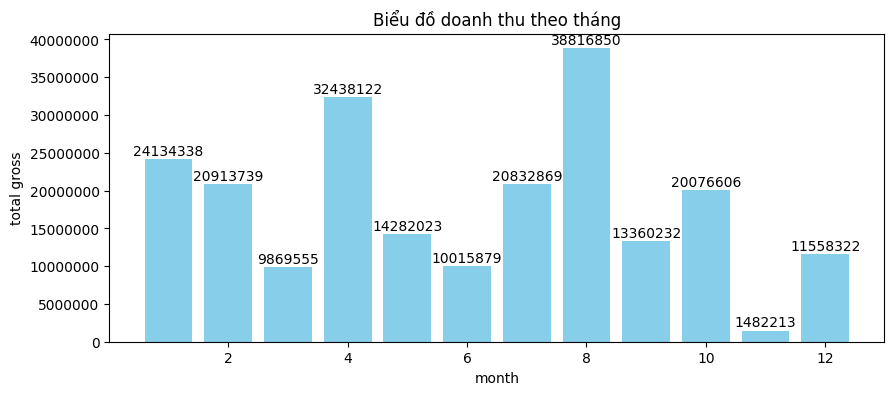

In [16]:
# visualize doanh thu theo tháng
plt.figure(figsize=(10,4))
plt.bar(df_month['month'],df_month['total'] , color='skyblue')
plt.title('Biểu đồ doanh thu theo tháng')
plt.xlabel('month')
plt.ylabel('total gross')
plt.ticklabel_format(axis='y', style='plain')
for i, v in enumerate(df_month['total']):
    plt.text(df_month['month'][i], v + 500000, str(v), ha='center')
plt.show()

### ta thấy tháng 8 có doanh thu cao nhất , và tháng 11 là tháng có doanh thu ít nhất

In [17]:
# đi tìm hiểu lí do tại sao lại có sự chênh lệch giữa đầu và giữa đến cuối năm như vậy:
# phân tích Distributor theo month tính total
df_dis_month = df.groupby(['month','Distributor']).agg(total=('Total Gross' , 'sum')).sort_values(by='month').reset_index()

In [18]:
#pivot
df_dis_pivot = df_dis_month.pivot(index='month' , columns='Distributor' , values='total').reset_index()
df_dis_pivot = df_dis_pivot.fillna(0)

In [ ]:
df_dis_pivot

Distributor,month,CGV,CGV Mars Dagitim,CJ Entertainment,Galaxy Studio,Lotte Entertainment,MUBI,Paramount Pictures International,Universal Pictures International (UPI),Walt Disney Pictures,unknown
0,1,0.0,9403766.0,0.0,14226494.0,317375.0,0.0,0.0,0.0,0.0,186703.0
1,2,2166004.0,6244518.0,9415486.0,1997952.0,0.0,0.0,0.0,1089779.0,0.0,0.0
2,3,6519248.0,223465.0,1733543.0,1344876.0,33517.0,0.0,0.0,0.0,0.0,14906.0
3,4,11504671.0,0.0,74729.0,20720047.0,119474.0,0.0,0.0,19201.0,0.0,0.0
4,5,10551963.0,0.0,1185250.0,1335508.0,1209302.0,0.0,0.0,0.0,0.0,0.0
5,6,6265888.0,0.0,168448.0,1227383.0,71433.0,0.0,0.0,2282727.0,0.0,0.0
6,7,9714412.0,0.0,7303724.0,1659713.0,542153.0,0.0,0.0,1449957.0,0.0,162910.0
7,8,1449400.0,0.0,311545.0,36432510.0,18140.0,0.0,0.0,444289.0,0.0,160966.0
8,9,2764836.0,0.0,208596.0,9693008.0,678191.0,0.0,0.0,15601.0,0.0,0.0
9,10,12264155.0,0.0,5962659.0,848243.0,754729.0,0.0,0.0,0.0,214998.0,31822.0


<Figure size 1200x400 with 0 Axes>

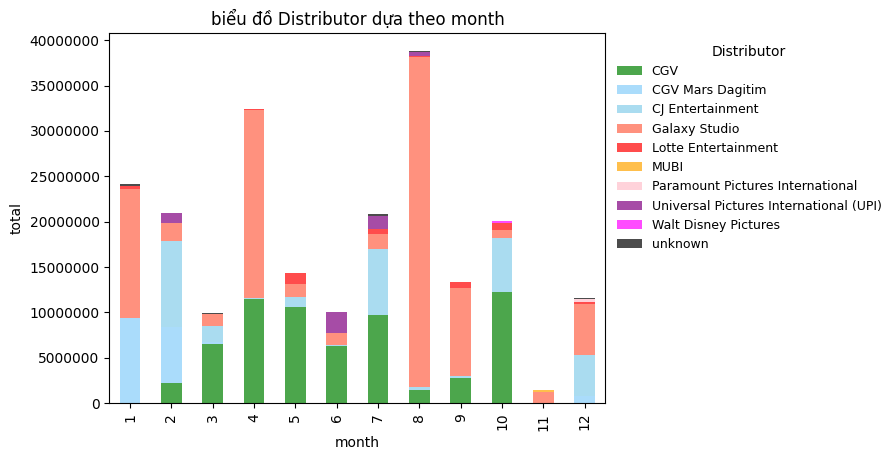

In [19]:
# visualize:
plt.figure(figsize=(12,4))
df_dis_pivot.plot(kind='bar' , x='month' , stacked=True, alpha=0.7 , color=['green','lightskyblue' ,'skyblue','tomato','red','orange','pink','purple','magenta','black'])
plt.title('biểu đồ Distributor dựa theo month')
plt.xlabel('month')
plt.ylabel('total')
plt.legend(title='Distributor', fontsize=9, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

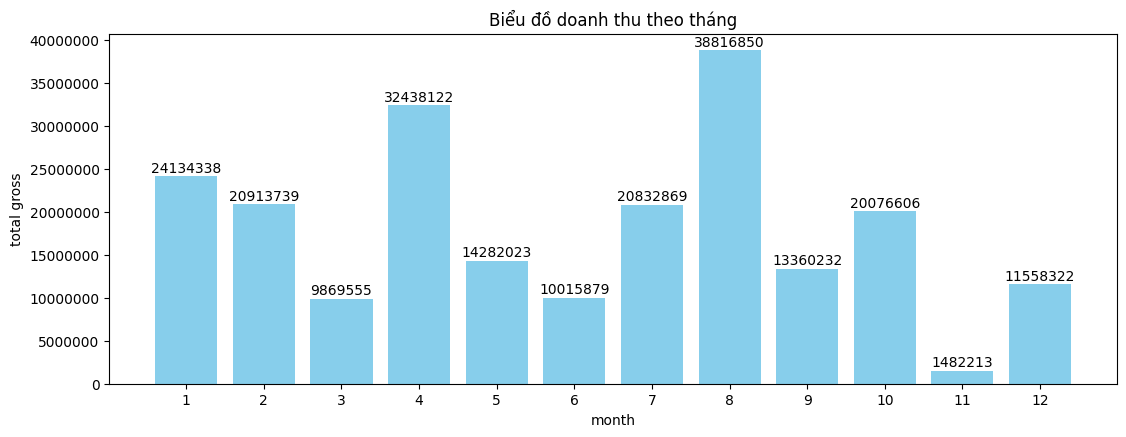

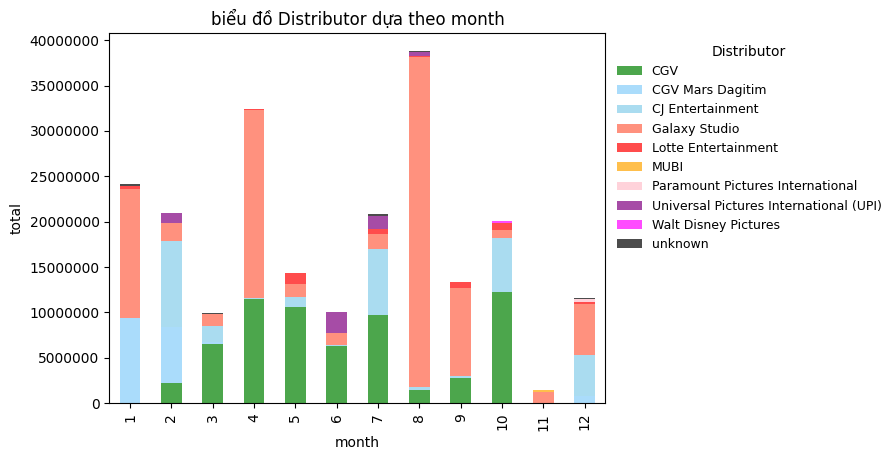

In [20]:
# visulize biểu đồ kết hợp
#chart 1
plt.figure(figsize=(13,10))
ax1 = plt.subplot(2,1,1)
plt.bar(df_month['month'],df_month['total'] , color='skyblue')
plt.title('Biểu đồ doanh thu theo tháng')
plt.xlabel('month')
plt.ylabel('total gross')
plt.xticks(ticks=range(1,13))
plt.ticklabel_format(axis='y', style='plain')
for i, v in enumerate(df_month['total']):
    plt.text(df_month['month'][i], v + 500000, str(v), ha='center')
#chart 2
df_dis_pivot.plot(kind='bar' , x='month' , stacked=True, alpha=0.7 , color=['green','lightskyblue' ,'skyblue','tomato','red','orange','pink','purple','magenta','black'])
plt.title('biểu đồ Distributor dựa theo month')
plt.xlabel('month')
plt.ylabel('total')
plt.legend(title='Distributor', fontsize=9, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
# tháng 8 là tháng có doanh thu cao nhất (>90% là đến từ nhà phát hành Galaxy Studio) , chứng tỏ nhà phát hành này tạo ra ảnh hưởng gần như tuyệt đối trong giai đoạn này
# Tương tự doanh thu cao thứ 2 là tháng 4 thì nhà phát hành trên cũng chiếm 60% --> các phim do Galaxy studio rất được ưa chuộng và dễ viral , cần nắm bắt thời gian ra phim của nhà phát hành trên để marketing tối ưu lợi nhuận và thu hút khách hàng
# ta thấy thường cuối năm (Tháng 11–12) ghi nhận rất ít phim chiếu, dẫn đến doanh thu giảm mạnh. Gợi ý chiến lược: áp dụng khuyến mãi combo vé – bắp nước, giảm giá theo nhóm hoặc khách hàng thân thiết để giữ doanh thu ổn định, tránh ‘mùa thấp điểm’.


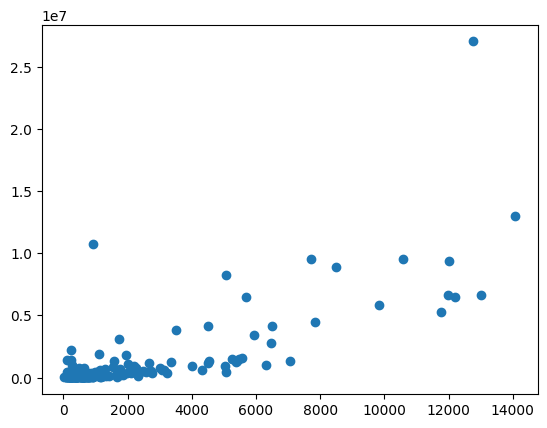

In [21]:
# phân tích mối tương quan giữa theater và doanh thu
plt.scatter(df['Theaters'], df['Total Gross'])
plt.show()

In [22]:
# ta có thể thấy được ở mức ~13000 rạp doanh thu đạt đỉnh , nhưng cũng có thời điểm ở mức tương tự hoặc hơn thì doanh thu chỉ đạt ở mức tầm trung
# xem các thông tin của các phim chiếu ở mức >= 12000
df[df['Theaters'] >= 12000].sort_values('Total Gross' , ascending=False)

,Rank,Release,Gross,Theaters,Total Gross,Release Date,Distributor,Estimated,month
0,1,Red Rain,"$26,679,574",12768,27028224.0,2025-08-21,Galaxy Studio,False,8
1,2,The 4 Rascals,"$10,253,939",14077,13017642.0,2025-01-29,Galaxy Studio,False,1
5,6,Nha Gia Tien,"$8,495,168",12024,9415486.0,2025-02-21,CJ Entertainment,False,2
7,8,Detective Conan: One-Eyed Flashback,"$6,606,193",13009,6606949.0,2025-07-19,CGV,False,7
10,11,Leaving Mom,"$5,799,514",12217,6507796.0,2025-07-30,CJ Entertainment,False,7


In [25]:
# phân tích sự viral của phim dựa trên yếu tố thời gian
df_fim_viral = df.groupby(['Release' , 'month']).agg(total=('Total Gross','sum')).sort_values(by='total',ascending=False).reset_index()

In [35]:
viral_threshold = 5000000
df_fim_viral_only = df_fim_viral[df_fim_viral['total'] > viral_threshold]

In [36]:
df_fim_pivot = df_fim_viral_only.pivot(index='month' , columns='Release' , values='total').reset_index()
df_fim_pivot = df_fim_pivot.fillna(0)

In [37]:
df_fim_pivot

Release,month,Avatar: The Way of Water2025 Re-release,Demon Slayer: Kimetsu no Yaiba- The Movie - Infinity Castle,Detective Conan: One-Eyed Flashback,Detective Kien: The Headless Horror,Doraemon: Nobita's Art World Tales,Face Off 8: Embrace of Light,Hijacked,Leaving Mom,Money Kisses,Nha Gia Tien,Red Rain,The 4 Rascals,The Corpse,Tunnel
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8291169.0,0.0,0.0,13017642.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9415486.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5810842.0,0.0
3,4,0.0,0.0,0.0,9536331.0,0.0,8887206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6641870.0
4,5,0.0,0.0,0.0,0.0,6466733.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7,0.0,0.0,6606949.0,0.0,0.0,0.0,0.0,6507796.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8,0.0,5311952.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27028224.0,0.0,0.0,0.0
7,9,0.0,0.0,0.0,0.0,0.0,0.0,9540357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10,10731308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1200x400 with 0 Axes>

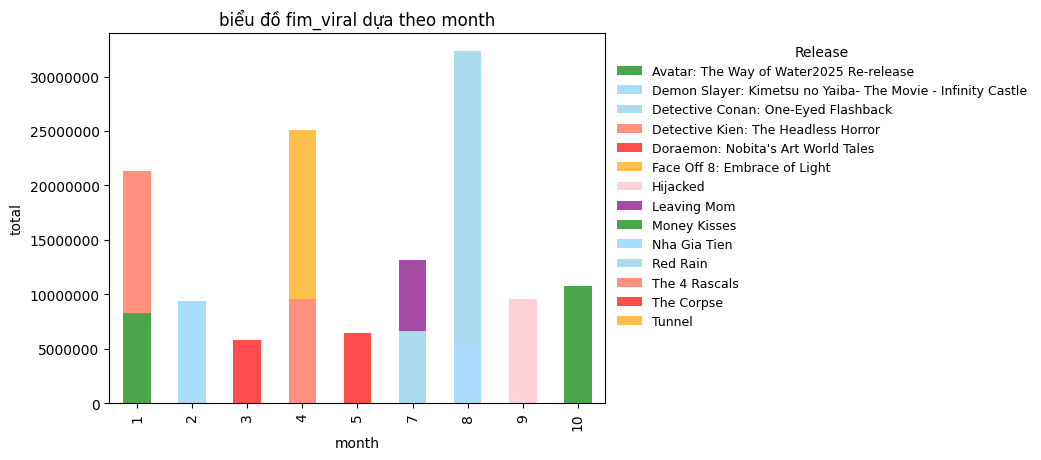

In [38]:
#visualize theo cột chồng dựa trên những phim có Total Gross > 500000 để tìm ra top phim viral
plt.figure(figsize=(12,4))
df_fim_pivot.plot(kind='bar' , x='month' , stacked=True, alpha=0.7 , color=['green','lightskyblue' ,'skyblue','tomato','red','orange','pink','purple'])
plt.title('biểu đồ fim_viral dựa theo month')
plt.xlabel('month')
plt.ylabel('total')
plt.legend(title='Release', fontsize=9, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
